# **Classify the Emails into Spam or Not.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import sklearn
import re
from nltk.tokenize import word_tokenize
import nltk

# Reading the Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/spam_or_not_spam.csv')
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


# Understanding the Data

In [4]:
df.dtypes

email    object
label     int64
dtype: object

In [5]:
df.shape

(3000, 2)

In [6]:
df.size

6000

In [7]:
df.columns

Index(['email', 'label'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [9]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
df.corr()

,label
label,1.0


In [11]:
df.nunique()

email    2872
label       2
dtype: int64

In [12]:
df.isnull().any()

email     True
label    False
dtype: bool

# DATA PREPROCESSING

In [13]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
# Preprocess the text with function processtext()
stop_words = stopwords.words("english")
punctuations = list(string.punctuation)
lemma = WordNetLemmatizer() # for Lemmatisation

In [15]:
def processtext(text):
    text=re.sub("[^a-zA-Z]"," ",str(text)) # Filter to allow only alphabets in text
    text=text.lower() # Convert the text to lowercase to maintain consistency
    tokens=word_tokenize(text) # Tokenize the text
    tokens=[token for token in tokens if token not in stop_words] 
    tokens=[lemma.lemmatize(token) for token in tokens if token not in punctuations] # Lemmatisation of tokens
    tokens=[token for token in tokens if token not in stop_words] 
    text=" ".join(tokens)
    return text

In [25]:
df["email"]

0       date wed number aug number number number numbe...
1       martin posted tasso papadopoulos greek sculpto...
2       man threatens explosion moscow thursday august...
3       klez virus die already prolific virus ever kle...
4       adding cream spaghetti carbonara effect pasta ...
                              ...                        
2995    abc good morning america rank number christmas...
2996    hyperlink hyperlink hyperlink let mortgage len...
2997    thank shopping u gift occasion free gift numbe...
2998    famous ebay marketing e course learn sell comp...
2999    hello chinese traditional number number f r v ...
Name: email, Length: 3000, dtype: object

In [17]:
df["email"] = df["email"].apply(lambda x: processtext(x))

# Data Visualization

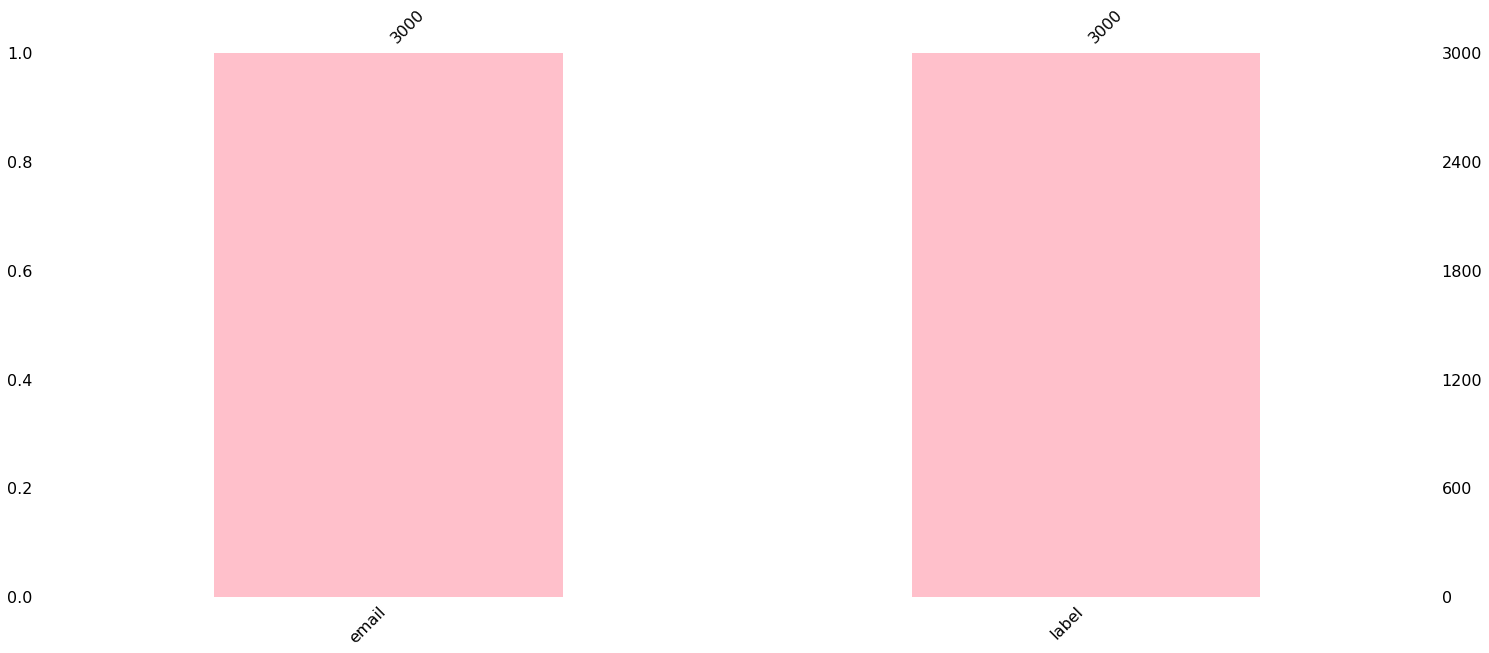

In [18]:
import missingno as no
no.bar(df, color='pink')

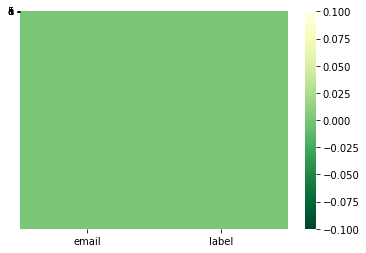

In [19]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlGn_r')

In [20]:
df = df.dropna()

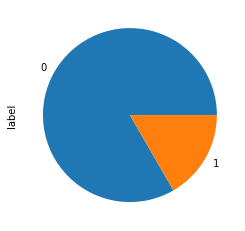

In [21]:
df.label.value_counts().plot(kind ='pie')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


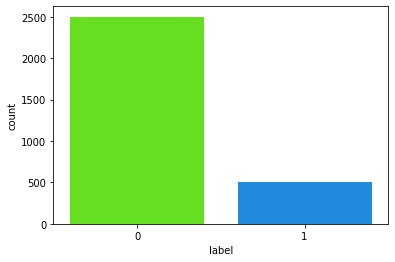

In [22]:
sns.countplot(df.label, palette='gist_rainbow')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


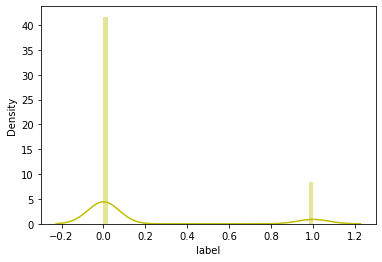

In [23]:
sns.distplot(df['label'], color='y')
plt.show()

# Splitting the Data into Dependent and Indpendent variables

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [27]:
x = df['email']
X = tfidf.fit_transform(x)
y = df['label']

# Training and Testing the Data

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Multiomial Naive Bayes Classifier

In [30]:
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

## Prediction

In [31]:
ypred_train = mnb.predict(Xtrain)
ypred_test = mnb.predict(Xtest)

## Confusion Matrix

In [33]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[628,   0],
       [ 80,  42]])

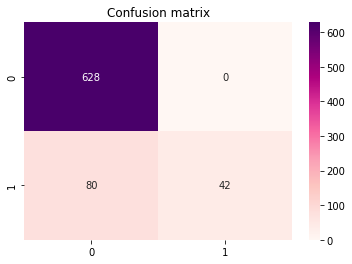

In [34]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdPu" ,fmt='g')
plt.title('Confusion matrix', y=5.1)
plt.show()

## Accuracy

In [35]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 89.82222222222222
Accuracy of testing data: 89.33333333333333


# Decission Tree

In [36]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier()

## Prediction

In [37]:
ypred_train = dt.predict(Xtrain)
ypred_test = dt.predict(Xtest)

## Confusion Matrix

In [38]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[607,  18],
       [ 21, 104]])

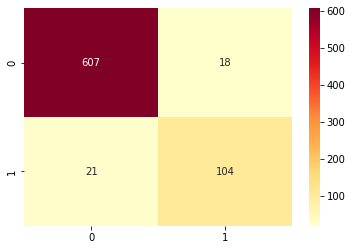

In [39]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')


## Accuracy

In [40]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 100.0
Accuracy of testing data: 94.8


[Text(0.5769230769230769, 0.875, 'X[4309] <= 0.002\ngini = 0.28\nsamples = 2250\nvalue = [1872, 378]'),
 Text(0.3076923076923077, 0.625, 'X[19920] <= 0.023\ngini = 0.168\nsamples = 2030\nvalue = [1842, 188]'),
 Text(0.15384615384615385, 0.375, 'X[11697] <= 0.018\ngini = 0.085\nsamples = 1835\nvalue = [1753, 82]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.066\nsamples = 1815\nvalue = [1753, 62]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.46153846153846156, 0.375, 'X[345] <= 0.034\ngini = 0.496\nsamples = 195\nvalue = [89, 106]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.415\nsamples = 150\nvalue = [44, 106]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(0.8461538461538461, 0.625, 'X[8471] <= 0.068\ngini = 0.236\nsamples = 220\nvalue = [30, 190]'),
 Text(0.7692307692307693, 0.375, 'X[5825] <= 0.028\ngini = 0.128\nsamples = 204\nvalue = [14, 190]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.069\

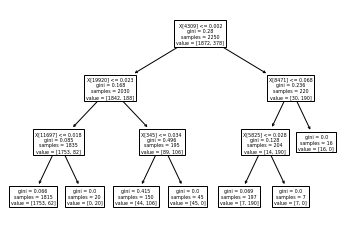

In [41]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(Xtrain, ytrain)
tree.plot_tree(clf_tree)